In [1]:
from ESRNN.m4_data import *
from ESRNN.utils_evaluation import evaluate_prediction_owa
from ESRNN.utils_visualization import plot_grid_prediction

In [2]:
X_train_df, y_train_df, X_test_df, y_test_df = prepare_m4_data(dataset_name="Hourly",
                                                               directory="../data/M4",
                                                               num_obs=414)

In [3]:
y_train_df

,unique_id,ds,y
0,H1,1970-01-01 00:00:00,605.0
1,H1,1970-01-01 01:00:00,586.0
2,H1,1970-01-01 02:00:00,586.0
3,H1,1970-01-01 03:00:00,559.0
4,H1,1970-01-01 04:00:00,511.0
...,...,...,...
353495,H99,1970-01-29 23:00:00,27926.0
353496,H99,1970-01-30 00:00:00,26744.0
353497,H99,1970-01-30 01:00:00,25829.0
353498,H99,1970-01-30 02:00:00,25421.0


In [4]:
from statsforecast import StatsForecast
from statsforecast.models import (
    AutoARIMA,
    HoltWinters,
    DynamicOptimizedTheta as DOT)


c:\Users\sonng\anaconda3\envs\tsff_env\lib\site-packages\statsforecast\core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


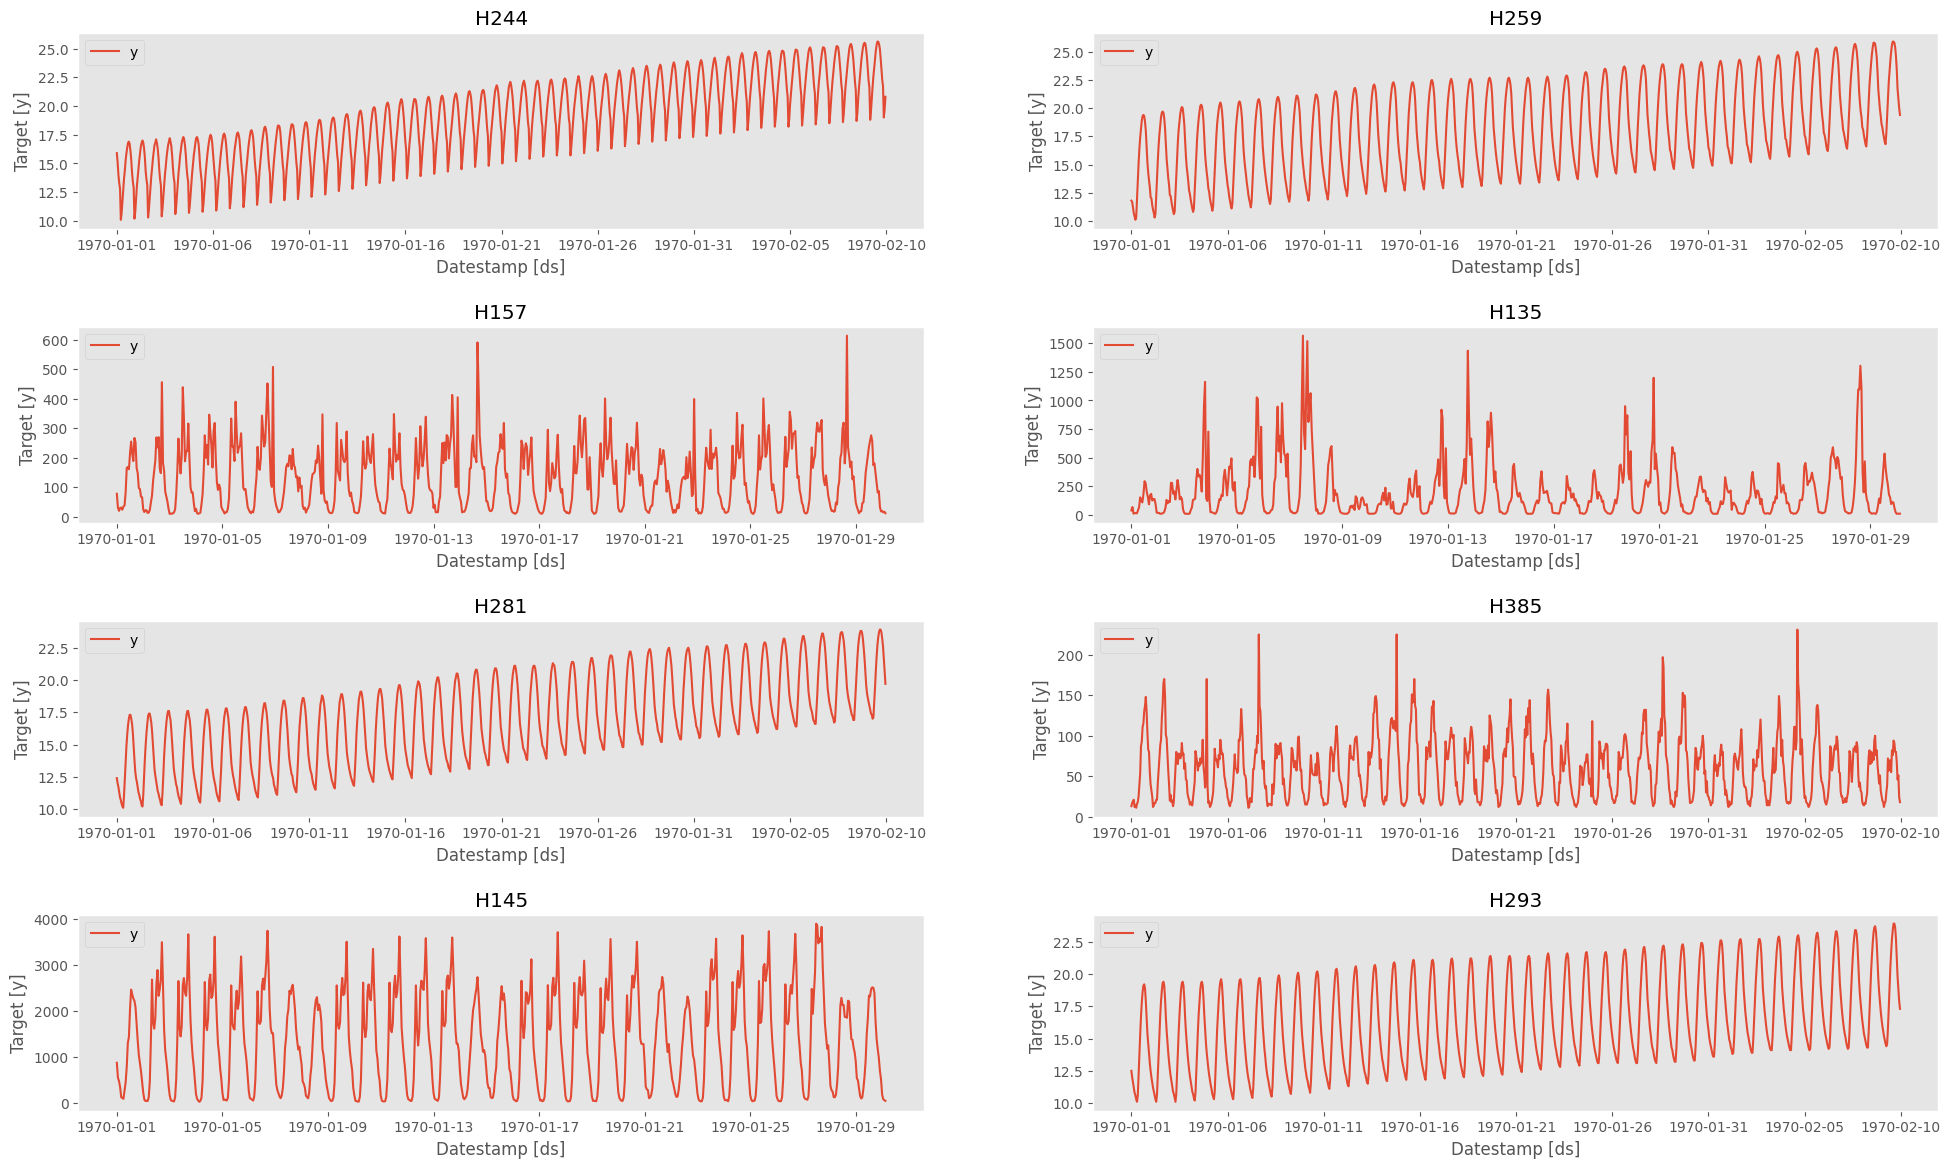

In [5]:
StatsForecast.plot(y_train_df, engine='matplotlib')

In [6]:
models = [
    AutoARIMA(season_length=24),
    # HoltWinters(),
    DOT(season_length=24)]

In [7]:
sf = StatsForecast(
    df=y_train_df, 
    models=models,
    freq='H', 
    n_jobs=-1,
    fallback_model = AutoARIMA(season_length=24),
    verbose=True)


In [8]:
y_hat_df = sf.forecast(h=48)

y_hat_df.head()


,ds,AutoARIMA,DynamicOptimizedTheta
unique_id,,,
H1,1970-01-30 04:00:00,614.176453,620.213501
H1,1970-01-30 05:00:00,541.414062,555.381409
H1,1970-01-30 06:00:00,504.215790,510.383820
H1,1970-01-30 07:00:00,475.115295,477.623962
H1,1970-01-30 08:00:00,453.990967,456.311798


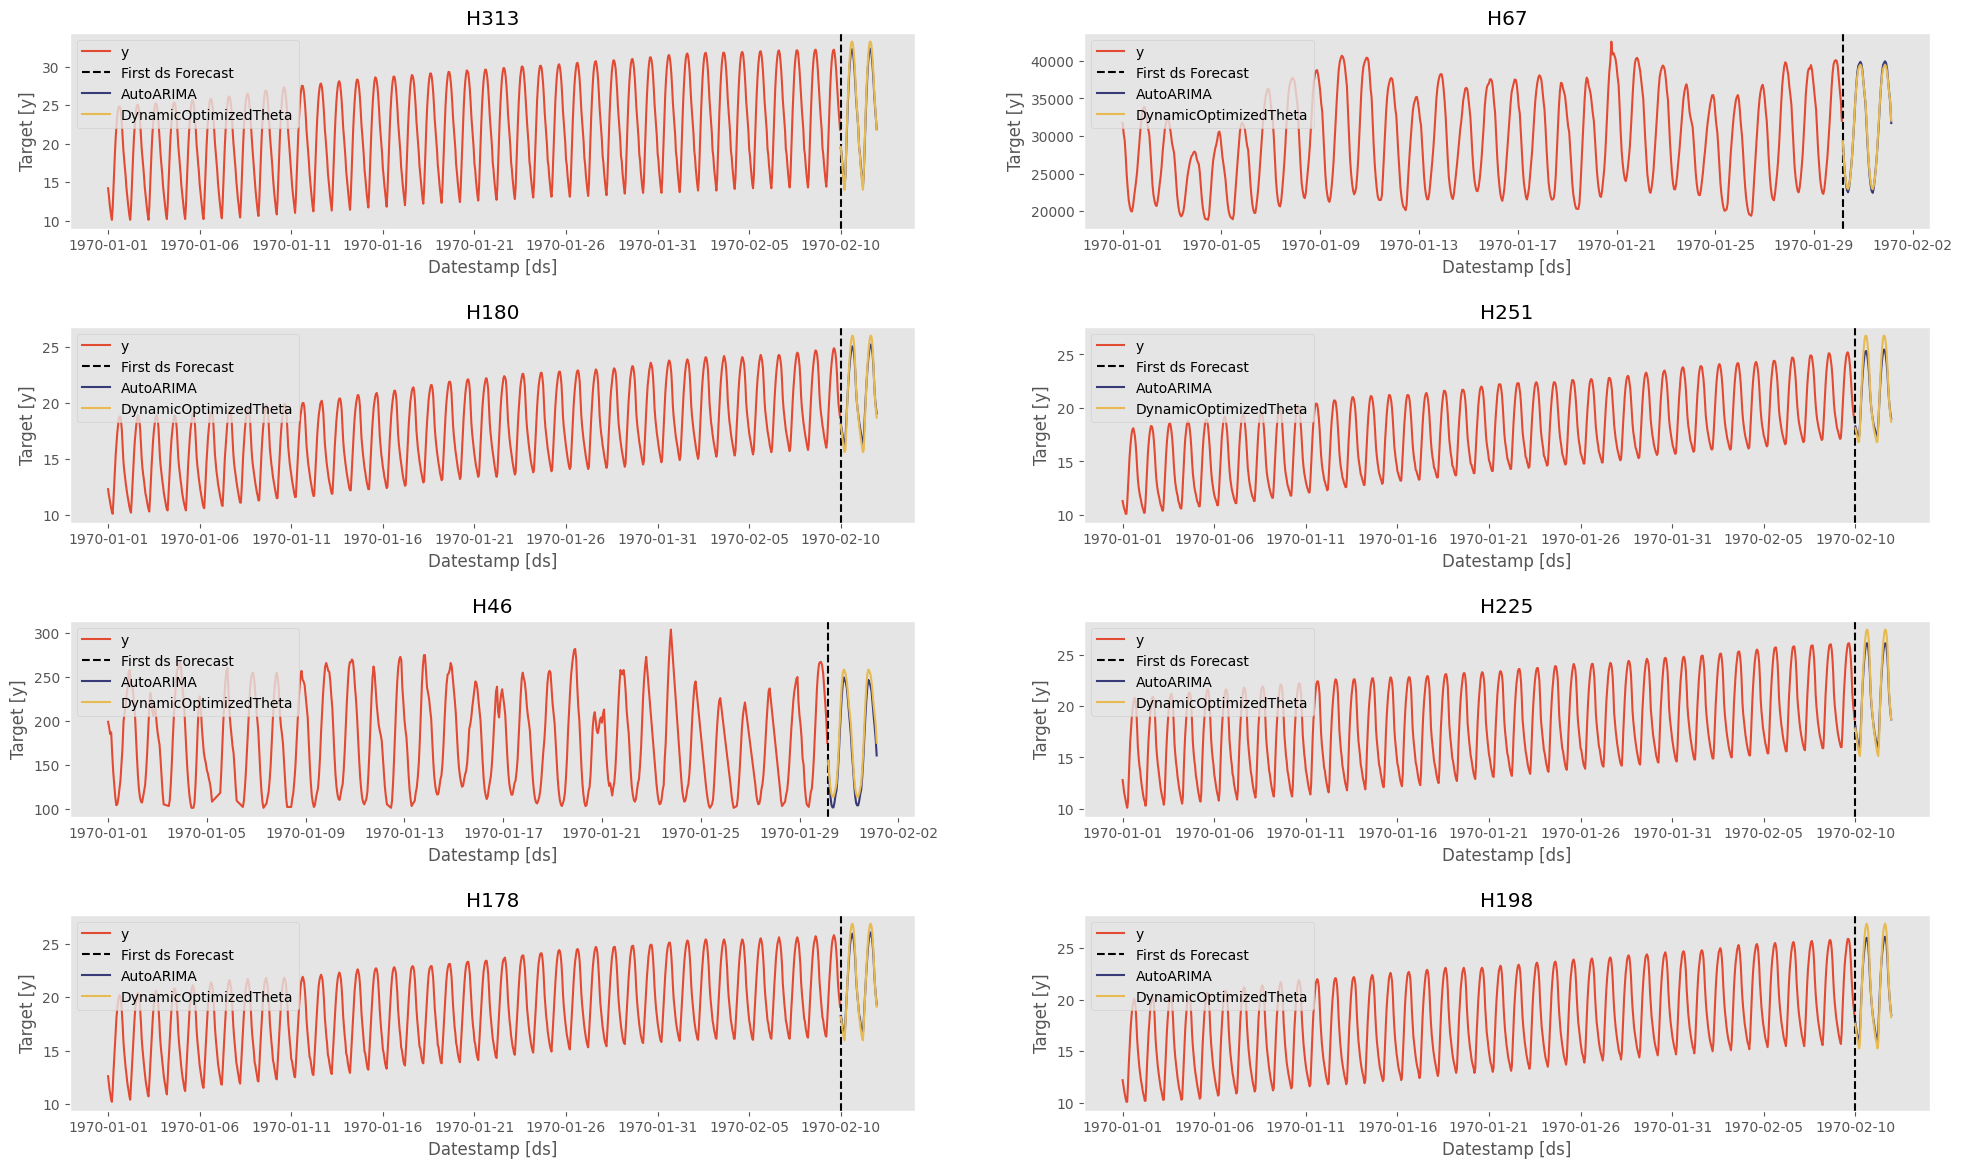

In [9]:
sf.plot(y_train_df, y_hat_df, engine='matplotlib')

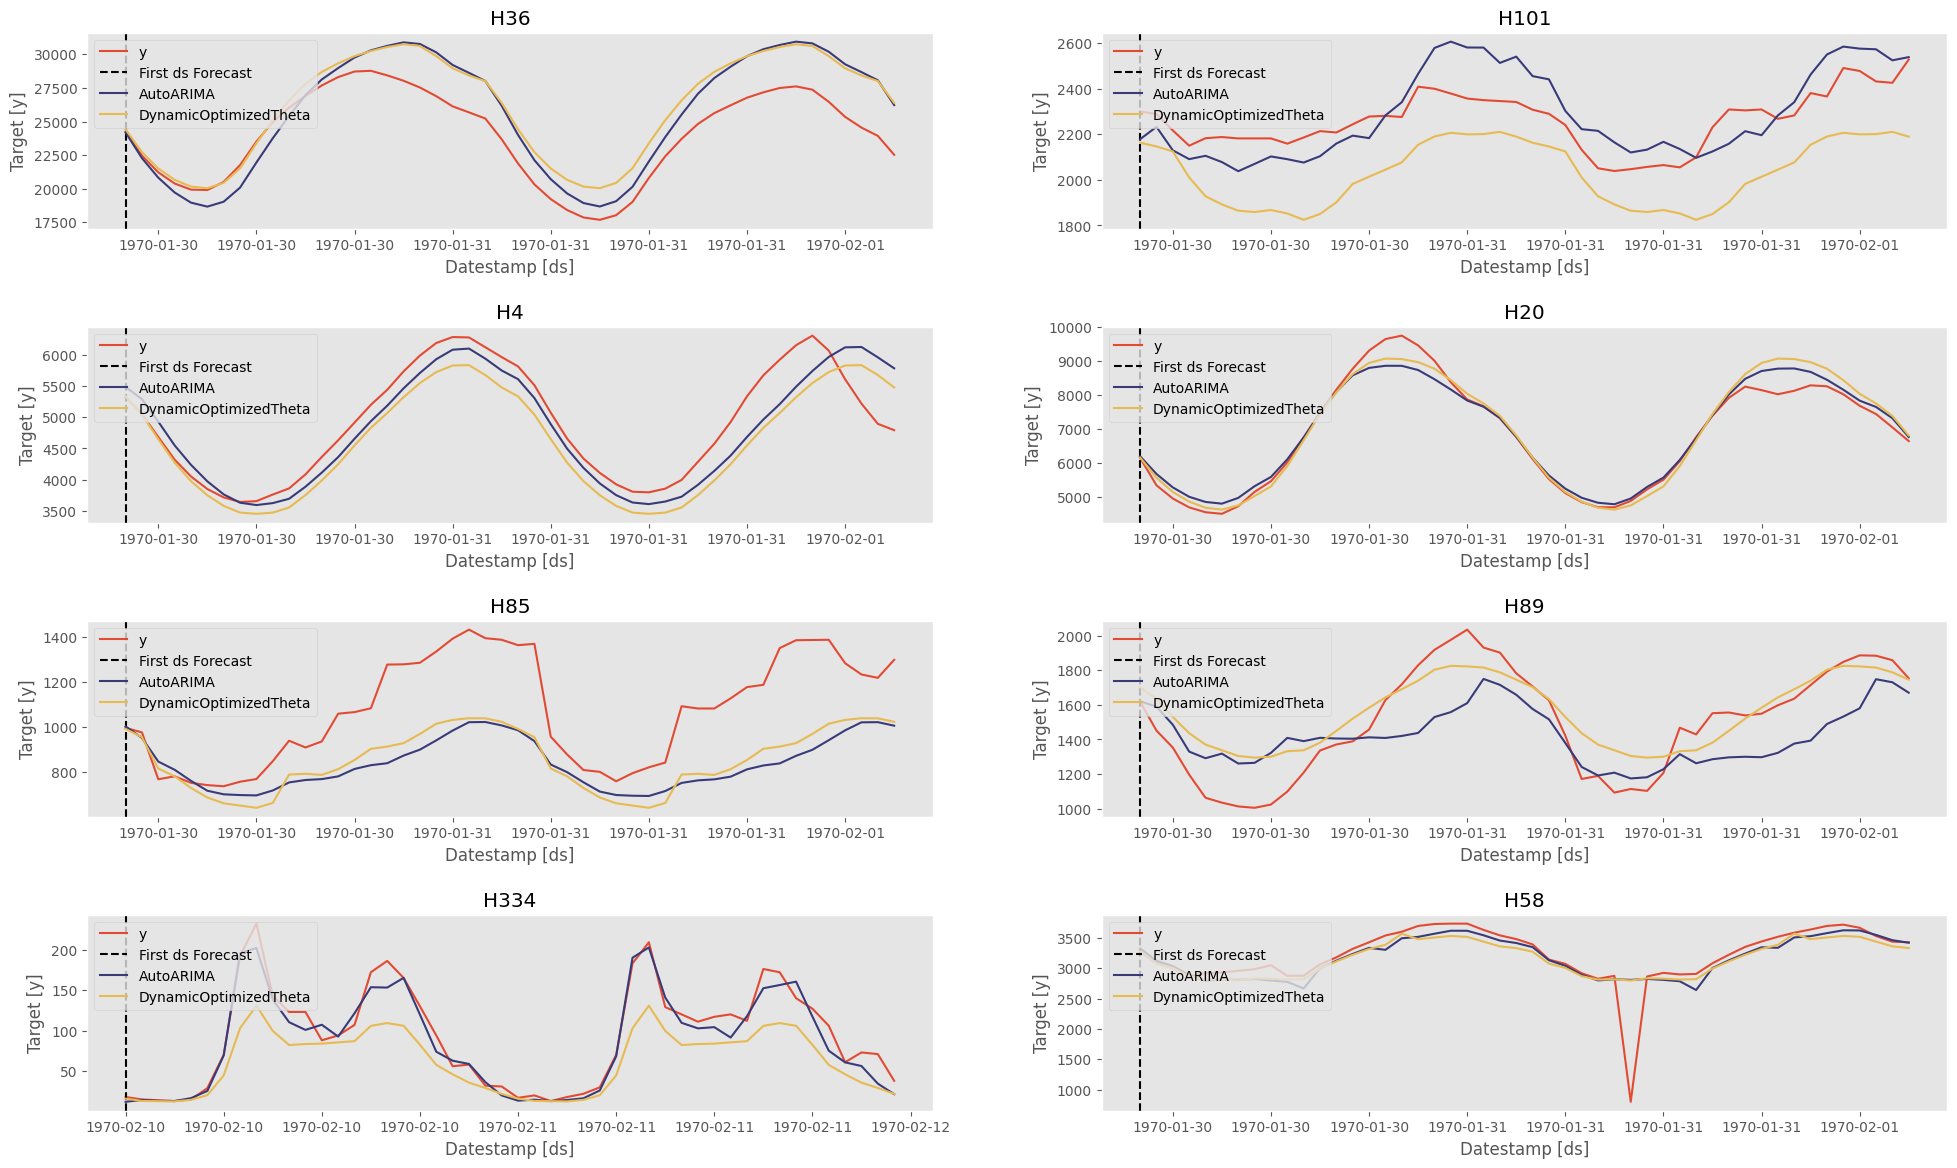

In [10]:
sf.plot(y_test_df, y_hat_df, engine='matplotlib')

In [26]:
y_hat_df_arima = y_hat_df.reset_index().iloc[:, [0, 1, 2]].rename(columns={'AutoARIMA' : 'y_hat'})
y_hat_df_theta = y_hat_df.reset_index().iloc[:, [0, 1, 3]].rename(columns={'DynamicOptimizedTheta' : 'y_hat'})

In [27]:
evaluate_prediction_owa(y_hat_df_arima, y_train_df, X_test_df, y_test_df, naive2_seasonality=24)

===============  Model evaluation  ==============
OWA: 0.587 
SMAPE: 13.698 
MASE: 1.029 


(0.5873197038108875, 1.0286655672745189, 13.697838500559625)

In [28]:
evaluate_prediction_owa(y_hat_df_theta, y_train_df, X_test_df, y_test_df, naive2_seasonality=24)

===============  Model evaluation  ==============
OWA: 0.99 
SMAPE: 18.095 
MASE: 2.385 


(0.9901574190918948, 2.385377675101853, 18.095170400569764)

In [37]:
y_hat_df_arima.to_csv('../results/m4/y_hat_df_arima.csv', index=False)
y_hat_df_theta.to_csv('../results/m4/y_hat_df_theta.csv', index=False)